<a href="https://colab.research.google.com/github/DarshanSuresh/Data-Mining/blob/main/LAB_07_12_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 07 - 12 March 2024

## DataSet

In [ ]:
import scipy.stats as stats

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Total Bill Distribution

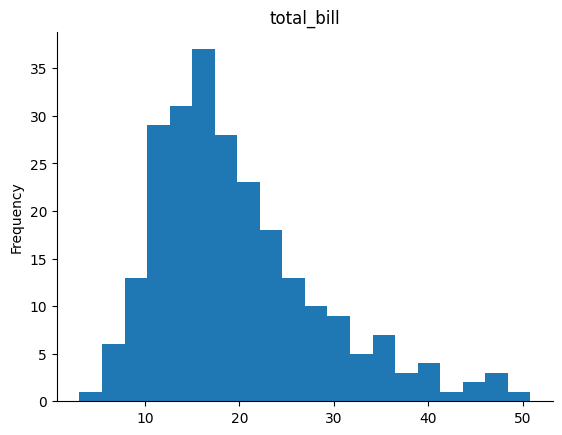

In [ ]:
from matplotlib import pyplot as plt
dataset['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Distribution of Smokers

<Axes: xlabel='total_bill', ylabel='Count'>

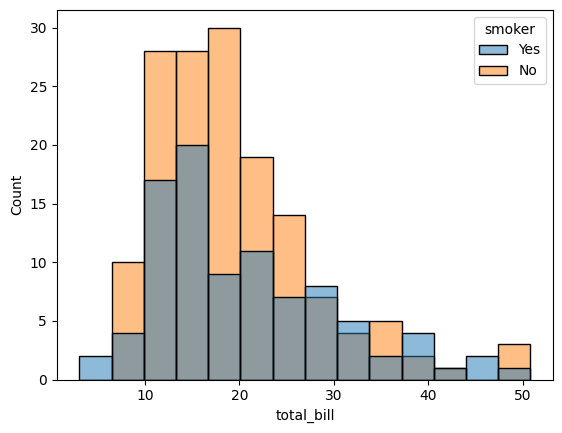

In [ ]:
sns.histplot(x = "total_bill", hue = "smoker", data = dataset)

### Cross tab

In [ ]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


### Observed Values

In [ ]:
Observed_Values = dataset_table.values
print("Observed Values :-\n", Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


### Chi-Square Test

In [ ]:
val = stats.chi2_contingency(dataset_table)
print(val)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))


In [ ]:
Expected_Values = val[3]

no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])

ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

#alpha = 0.05
#alpha = 0.001
alpha = 0.01

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistical = chi_square[0]+chi_square[1]

p_value=1-chi2.cdf(x=chi_square_statistical,df=ddof)

print('Significance_level:',alpha)
print('Degree of Freedom:',ddof)
print('p-value:',p_value)

Significance_level: 0.01
Degree of Freedom: 1
p-value: 0.964915107315732


In [ ]:
if p_value<=alpha:
  print("Reject H0, There is a relationship between 2 categorical variables")
else:
  print("Retain H0, There is no relationahip between 2 categorical variables")

Retain H0, There is no relationahip between 2 categorical variables


## Library Dataset

In [ ]:
df = pd.read_csv('Library.csv')
print(df)

   Gender Financial_knowledge
0    Male                 yes
1  Female                  no
2    Male                  no
3    Male                 yes
4    Male                 yes
5  Female                 yes
6  Female                  no
7    Male                 yes
8    Male                 yes
9    Male                 yes


In [ ]:
dataset_table = pd.crosstab(df['Gender'],df['Financial_knowledge'])
print(dataset_table)

Financial_knowledge  no  yes
Gender                      
Female                2    1
Male                  1    6


In [ ]:
Observed_Values = dataset_table.values
print("Observed Values :-\n", Observed_Values)

Observed Values :-
 [[2 1]
 [1 6]]


In [ ]:
val = stats.chi2_contingency(dataset_table)
print(val)

Chi2ContingencyResult(statistic=0.8163265306122448, pvalue=0.366256395824783, dof=1, expected_freq=array([[0.9, 2.1],
       [2.1, 4.9]]))


In [ ]:
Expected_Values = val[3]

no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])

ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
#alpha = 0.001
#alpha = 0.01

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistical = chi_square[0]+chi_square[1]

p_value=1-chi2.cdf(x=chi_square_statistical,df=ddof)

print('Significance_level:',alpha)
print('Degree of Freedom:',ddof)
print('p-value:',p_value)

Significance_level: 0.05
Degree of Freedom: 1
p-value: 0.0976345361407196


In [ ]:
if p_value<=alpha:
  print("Reject H0, There is a relationship between 2 categorical variables")
else:
  print("Retain H0, There is no relationahip between 2 categorical variables")

Retain H0, There is no relationahip between 2 categorical variables


## Co-variance for Iris DataSet

In [ ]:
data = pd.read_csv('iris.csv')

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Sepal_Length & Sepal_Width

In [ ]:
newdata1 = data[['sepal_length', 'sepal_width']]
newdata1.head(5)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
newdata1.cov()

,sepal_length,sepal_width
sepal_length,0.685694,-0.039268
sepal_width,-0.039268,0.188004


In [ ]:
newdata1.corr(method='pearson')

,sepal_length,sepal_width
sepal_length,1.000000,-0.109369
sepal_width,-0.109369,1.000000


#### Petal_Length & Petal_Width

In [ ]:
newdata2 = data[['petal_length', 'petal_width']]
newdata2.head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
newdata2.cov()

,petal_length,petal_width
petal_length,3.113179,1.296387
petal_width,1.296387,0.582414


In [ ]:
newdata2.corr(method='pearson')

,petal_length,petal_width
petal_length,1.000000,0.962757
petal_width,0.962757,1.000000


#### Sepal_Length & Petal_Width

In [ ]:
newdata3 = data[['sepal_length', 'petal_width']]
newdata3.head(5)

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [ ]:
newdata3.cov()

,sepal_length,petal_width
sepal_length,0.685694,0.516904
petal_width,0.516904,0.582414


In [ ]:
newdata3.corr(method='pearson')

,sepal_length,petal_width
sepal_length,1.000000,0.817954
petal_width,0.817954,1.000000


#### Sepal_Length & Petal_Length

In [ ]:
newdata4 = data[['sepal_length', 'petal_length']]
newdata4.head(5)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
newdata4.cov()

,sepal_length,petal_length
sepal_length,0.685694,1.273682
petal_length,1.273682,3.113179


In [ ]:
newdata4.corr(method='pearson')

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


#### Sepal_Width & Petal_Length

In [ ]:
newdata5 = data[['sepal_width', 'petal_length']]
newdata5.head(5)

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
newdata5.cov()

,sepal_width,petal_length
sepal_width,0.188004,-0.321713
petal_length,-0.321713,3.113179


In [ ]:
newdata5.corr(method='pearson')

,sepal_width,petal_length
sepal_width,1.000000,-0.420516
petal_length,-0.420516,1.000000


#### Sepal_Width & Petal_Width

In [ ]:
newdata6 = data[['sepal_width', 'petal_width']]
newdata6.head(5)

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [ ]:
newdata6.cov()

,sepal_width,petal_width
sepal_width,0.188004,-0.117981
petal_width,-0.117981,0.582414


In [ ]:
newdata6.corr(method='pearson')

,sepal_width,petal_width
sepal_width,1.000000,-0.356544
petal_width,-0.356544,1.000000
